## Install NEMtropy

Example notebooks are available at https://github.com/nicoloval/NEMtropy/tree/master/examples

In [ ]:
pip install NEMtropy

## Basic usage

In [1]:
import networkx as nx
import numpy as np
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist

In [2]:
# let's take Zachary's Karate Club network
g = nx.karate_club_graph()

In [3]:
# then we convert it to numpy adjacency matrix
adj_kar = nx.to_numpy_array(g)

In [4]:
# and we initialize a NEMtropy UndirectedGraph object
graph = UndirectedGraph(adj_kar)

In [5]:
# then we need to solve the maximum likelihood problem for the model of our choice
# model choices for UndirectedGraph are "cm_exp", "ecm_exp" and "crema" which is a faster implementation of "ecm_exp"
# don't worry about warnings, it's normal

graph.solve_tool(model="cm_exp")

/home/carlo/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/carlo/anaconda3/lib/python3.8/site-packages/NEMtropy/models_functions.py:461: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/home/carlo/anaconda3/lib/python3.8/site-packages/NEMtropy/models_functions.py:462: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]



solution error = 1.1197450966449196e-08


/home/carlo/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


In [11]:
# now graph contains the maximum likelihood solution and we can use it to sample networks from the ERGM
graph.ensemble_sampler(10, cpu_n=1, output_dir="sample/")

# this saves networks in form of edgelists in the output_dir subfolder

In [12]:
# so now we can load the samples and analyze them

clust = []
clust_orig = nx.average_clustering(g)

for i in range(10):
    edgelist_ens = np.loadtxt(f"sample/{i}.txt")
    net = nx.Graph()
    net.add_edges_from(edgelist_ens)
    clust.append(nx.average_clustering(net))

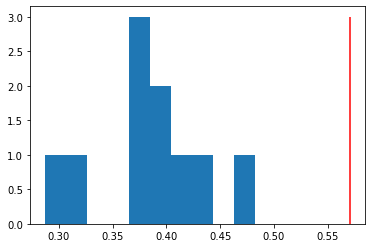

In [18]:
import matplotlib.pyplot as plt

plt.hist(clust)
plt.vlines(clust_orig, 0,3, "red")

## For weighted networks

In [20]:
# First of all we generate the adjacency matrix of a weighted undirected graph using the matrix_generator module of NEMtropy
from NEMtropy import matrix_generator

adj_weigh = matrix_generator.random_weighted_matrix_generator_uniform_custom_density(n=30,
                                                                                     p=0.2,
                                                                                     sym=True,
                                                                                     sup_ext=30,
                                                                                     intweights=True)

# Then we intialise the graph instance
graph = UndirectedGraph(adj_weigh)

# use model "crema", which is a slightly more optimal version of the UECM and DECM models
graph.solve_tool(model="crema",
                 method="newton",
                 initial_guess="random",
                 adjacency="cm_exp",
                 method_adjacency="newton")

/home/carlo/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/carlo/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/carlo/anaconda3/lib/python3.8/site-packages/NEMtropy/models_functions.py:1554: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/home/carlo/anaconda3/lib/python3.8/site-packages/NEMtropy/models_functions.py:1555: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/home/carlo/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warn


solution error = 2.452088940785302e-07


In [21]:
# sample some weighted random networks
graph.ensemble_sampler(10, cpu_n=1, output_dir='sample/')

In [22]:
# to read the adjacency list we now need a method that maps it to a weighted adjacency matrix
edgelist_ens = np.loadtxt("sample/0.txt")

ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                        is_directed = False,
                                        is_sparse = False,
                                        is_weighted = True)

# and generate a networkx graph from it
G = nx.from_numpy_array(ens_adj)